In [1]:
### TechnoHacks - Machine learning intern batch 11
### Task 2 : 6# Fraud Transaction Detection
### Task description : Use a dataset containing transaction data to detect fraudulent transactions.
### The used algorithm is RandomForest classifier with accuracy 99.95%
### done by Nada Mossad Mohamed Ahmed Abodegham

In [28]:
# Uploading the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay ,precision_score, recall_score, f1_score
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier , RandomForestClassifier 

In [9]:
# Preparing data
df=pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [10]:
# Get a sample of the data
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
57676,48010.0,-0.824972,0.328005,0.173963,0.980225,2.223494,-0.198765,0.544855,-0.204458,-0.451076,...,-0.089006,0.041972,-0.005203,-1.442658,0.400063,-0.179830,-0.207127,-0.117970,1.00,0
66698,52175.0,0.774550,-0.890837,0.622001,0.847978,-0.781463,0.347945,-0.191609,-0.014415,0.863614,...,-0.103437,-0.507978,-0.278506,-0.362511,0.328992,0.396280,-0.027647,0.060212,250.00,0
141111,84126.0,-2.471015,1.976709,-0.611514,-0.034922,-0.710284,-0.018103,-0.725533,1.677535,-0.382322,...,-0.102803,-0.588547,-0.203273,-0.961267,0.287829,0.306762,-0.323829,-0.082660,20.10,0
101489,67850.0,-1.230821,1.078259,1.834094,1.109636,-0.415936,-0.097442,0.147350,0.622905,-0.384013,...,-0.142625,-0.347122,-0.052441,0.374575,0.296338,-0.383558,0.227759,0.055067,29.99,0
61178,49697.0,1.450636,-1.339952,0.870353,-1.287251,-1.670463,0.154048,-1.477081,0.015675,-1.122644,...,-0.267412,-0.219628,-0.076382,-0.427103,0.380473,-0.150106,0.078160,0.031736,45.00,0


In [11]:
# Exploring the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [13]:
### dataframe shape -> 284807rows ,31 columns
df.shape

(284807, 31)

In [14]:
### Data cleaning

In [15]:
# Check for missing data
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [17]:
# knowing number of duplicate
df.duplicated().sum()

1081

In [19]:
# Deleting the duplicate 
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [25]:
# knowing the number of Fraud and Not Fraud
df.Class.value_counts().rename(index={0:'Not Fraud',1:'Fraud'})

Not Fraud    283253
Fraud           473
Name: Class, dtype: int64

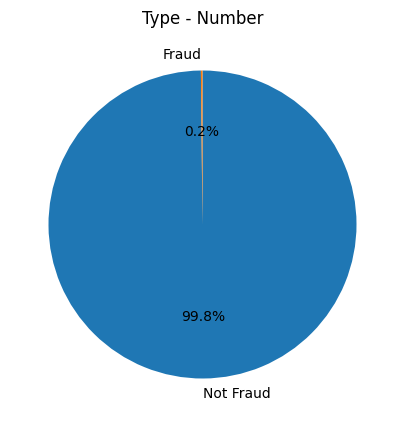

In [26]:
# knowing the percent of each Type
counts = df["Class"].value_counts() 
plt.figure(figsize=(5,5))
plt.pie(counts, labels = ['Not Fraud' , 'Fraud'], startangle = 90,counterclock = False, autopct='%1.1f%%')
plt.title("Type - Number")
plt.show()

In [23]:
X= df.drop(["Class"],axis=1)
y=df["Class"]

In [24]:
#  Separate the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 1)

In [29]:
model= RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [30]:
# Make prediction and print accuracy
RF_prediction = model.predict(X_test)
Accuracy= print('Accuracy score: ', format(accuracy_score(y_test, RF_prediction),'%'))

Accuracy score:  99.951832%


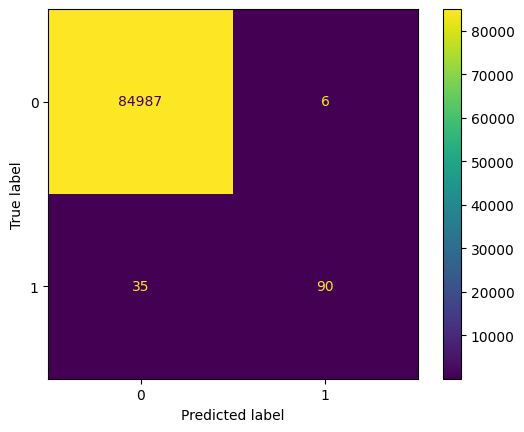

In [31]:
# Drawing the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test,RF_prediction)
plt.show()